# <span style="color:red"> Dataset of one feature and its class belonging is given. Train a model which can predict its dataset</span>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x1 = torch.rand(250, 2)*(-10)

In [3]:
y1 = torch.tensor([[0.] for features in x1])

In [4]:
x2 = torch.rand(250, 2)*(10)

In [5]:
y2 = torch.tensor([[1.] for features in x2])

In [6]:
x = torch.cat((x1, x2), dim=0)

In [7]:
y = torch.cat((y1, y2), dim=0)

In [8]:
DS = {'X': x, 'Y': y}

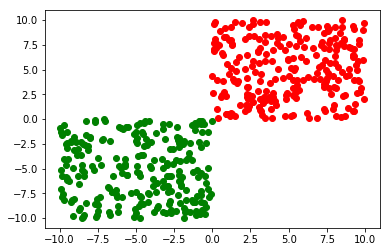

In [9]:
for x_, y_ in zip(DS['X'], DS['Y']):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset

In [10]:
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return y.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [11]:
dataset = MyCustomDataset(DS['X'], DS['Y'])

## DataLoader

In [12]:
from torch.utils.data import DataLoader

batch_size = 8

train_loader = DataLoader(dataset, batch_size, shuffle=True)

# Model

In [13]:
class binary_classification(torch.nn.Module):
    
    def __init__(self, input_size, output_size, hidden_neuron_cnt):
        
        super(binary_classification, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_neuron_cnt)
        self.act = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(hidden_neuron_cnt, output_size)

    def forward(self, x):
        
        out = self.linear1(x)
        out = self.act(out)
        out = self.linear2(out)
        out = self.act(out)
        return out

In [14]:
model = binary_classification(2, 1, 4)

# Loss

In [15]:
criterion = torch.nn.BCELoss() 

# Optimizer

In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [17]:
with torch.no_grad():
    y_pred = model(DS['X'])
    y_pred = torch.round(y_pred)

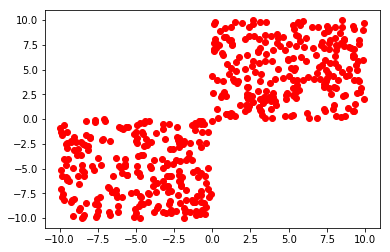

In [18]:
for x_, y_ in zip(DS['X'], y_pred):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')

In [19]:
LOSS = []
for epoch in range(5):
    sum_loss_in_batch = 0.
    for x, y in train_loader:
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss_in_batch += loss.item()
        
    loss_in_epoch = sum_loss_in_batch/batch_size
    LOSS.append(loss_in_epoch)
    print(f"Epoch {epoch} Loss: {loss_in_epoch}")

Epoch 0 Loss: 4.158425405621529
Epoch 1 Loss: 0.04030114412307739
Epoch 2 Loss: 0.03977791219949722
Epoch 3 Loss: 0.039172835648059845
Epoch 4 Loss: 0.03850147873163223


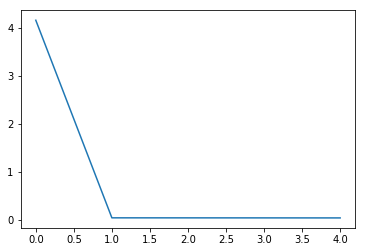

In [20]:
plt.plot(LOSS[:])

In [21]:
with torch.no_grad():
    y_pred = model(DS['X'])
    y_pred = torch.round(y_pred)

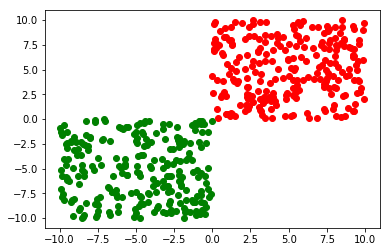

In [22]:
for x_, y_ in zip(DS['X'], y_pred):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')